<a href="https://colab.research.google.com/github/chacha86/pythonai/blob/main/%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_%EC%88%99%EB%B0%95%EB%A3%8C_%EC%98%88%EC%B8%A12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
os.environ['KAGGLE_USERNAME'] = 'chasaem'
os.environ['KAGGLE_KEY'] = '70c03eb538dfde2fdce9ad73955df8a7'

!kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data
!unzip '*.zip'
     

 82% 2.00M/2.44M [00:00<00:00, 2.66MB/s]
100% 2.44M/2.44M [00:00<00:00, 2.72MB/s]
Archive:  new-york-city-airbnb-open-data.zip
  inflating: AB_NYC_2019.csv         
  inflating: New_York_City_.png      


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

<ipython-input-1-7ac230a11f24>:34: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price']
<ipython-input-1-7ac230a11f24>:80: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3.corr()['price']


latitude                          0.06972
longitude                        -0.29929
price                             1.00000
minimum_nights                    0.03194
number_of_reviews                -0.04188
calculated_host_listings_count    0.17577
availability_365                  0.08232
Name: price, dtype: float64

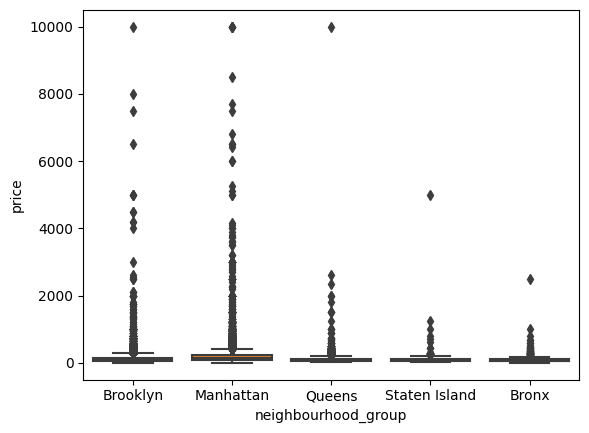

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 설명
# id: 일련번호
# name: AirBnB 이름
# host_id: 호스트 ID  
# host_name: 호스트 성명 
# neighbourhood_group: 지구명
# neighbourhood : 지역명
# latitude: 위도  
# longitude: 경도  
# room_type: 방 타입  
# price: 가격  
# minimum_nights: 최소 숙박일수  
# number_of_reviews: 리뷰 개수
# last_review: 최근 리뷰 일자
# reviews_per_month: 월 평균 리뷰 수
# calculated_host_listings_count:  호스트에게 대여 가능한 에어비앤비의 총 개수
# availability_365: 1년 중 가능한 대여일

df = pd.read_csv('/content/AB_NYC_2019.csv')
     

pd.options.display.float_format = '{:.5f}'.format
df.info()
df.describe()

     

# 수치형데이터와 price 상관관계 
df.corr()['price']
     

# 범주형 데이터의 price 상관관계

#df.info()
df.head()
df.columns
'''
neighbourhood_group, neighbourhood, room_type, last_review
'''

df['neighbourhood_group'].value_counts() # 5
df['neighbourhood'].value_counts() # 221
df['room_type'].value_counts() # 3
df['last_review'].value_counts() # 1764


## 범주와 수치와 관계 => 막대, 박스
## 수치와 수치 => 산점도, 선

sns.boxplot(data=df, x='neighbourhood_group', y='price')
     

# 불필요해 보이는 컬럼 삭제 -> id, , host_id, host_name, last_review, reviews_per_month

df2 = df.drop(['id', 'name', 'host_id', 'last_review', 'reviews_per_month'], axis=1)
df2.info()
     

# 데이터 클리닝 진행 1
# 이상데이터(아웃라이어) 제거
# sns.histplot(data=df2, x='price')

# 데이터의 95% 
## 오른쪽(4)
## 왼쪽(1)

max = df2['price'].quantile(0.96) #  0 ~ 1
min = df2['price'].quantile(0.01) #  0 ~ 1


df3 = df2[(df2['price'] < max) & (df2['price'] > min)]

df2.shape, df3.shape
     
df3.corr()['price']

In [2]:
max, min
#df3.info()

print(df3.columns)

df3['minimum_nights'].describe()

#sns.histplot(data=df3, x='minimum_nights')

## 히스토그램으로 분포가 잘 안보일 때
# sns.rugplot(data=df3, x='minimum_nights')

## minimum_nights는 98% 데이터가 수치 30 이하에 몰려있다.
max = df3['minimum_nights'].quantile(0.98)
df4 = df3[df3['minimum_nights'] < max]


Index(['host_name', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [3]:
df4['number_of_reviews'].describe()
max = df4['number_of_reviews'].quantile(0.99)

df5 = df4[df4['number_of_reviews'] < max]

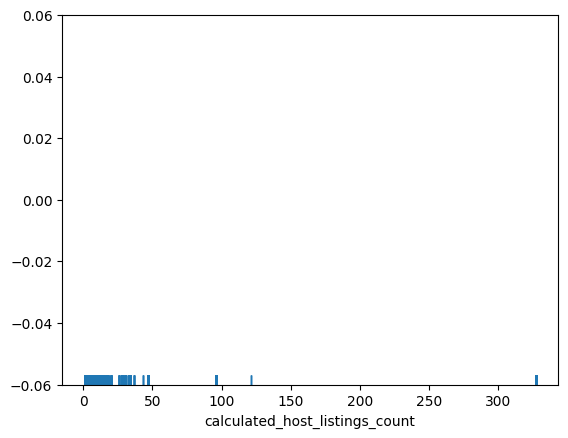

In [4]:
df5['calculated_host_listings_count'].describe()
sns.rugplot(data=df5, x='calculated_host_listings_count')

## minimum_nights는 98% 데이터가 수치 30 이하에 몰려있다.
max = df5['calculated_host_listings_count'].quantile(0.99)
df6 = df5[df5['calculated_host_listings_count'] < max]

In [5]:
## 일단은 0을 그냥 0이라고 판단하고 진행
df6.columns
df6['availability_365'].describe()

count   41160.00000
mean       95.95432
std       123.78485
min         0.00000
25%         0.00000
50%        24.00000
75%       178.00000
max       365.00000
Name: availability_365, dtype: float64

In [6]:
df6.corr()['price']

<ipython-input-6-384569783cc2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df6.corr()['price']


latitude                          0.05980
longitude                        -0.27900
price                             1.00000
minimum_nights                   -0.01801
number_of_reviews                -0.02357
calculated_host_listings_count   -0.06600
availability_365                  0.04020
Name: price, dtype: float64

<Axes: xlabel='neighbourhood_group', ylabel='price'>

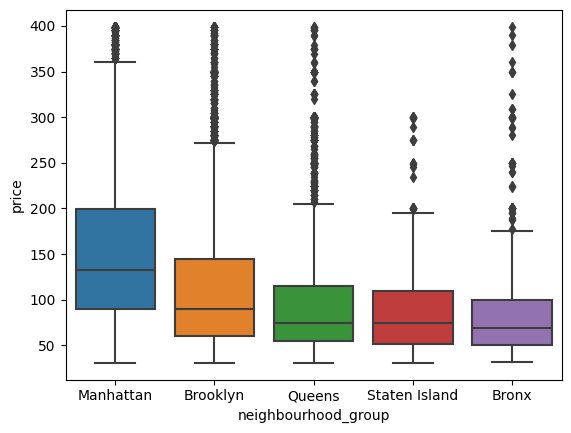

In [7]:
df6.columns

df6['neighbourhood_group'].value_counts()

# neighbourhood_group은 숙박료와 약간의 상관관계가 있다고 보여짐.
sns.boxplot(data=df6, x='neighbourhood_group', y='price', order=df6.groupby('neighbourhood_group')['price'].median().sort_values(ascending=False).index)


<Axes: xlabel='room_type', ylabel='price'>

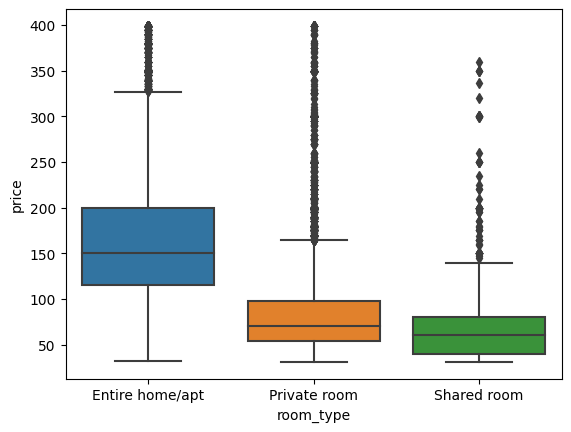

In [8]:
## room_type과 숙박료가 상관관계가 있는지 판단해주세요.
## room_type과 숙박료와 약간의 상관관계가 있다고 보여짐.
df6['room_type'].value_counts()
sns.boxplot(data=df6, x='room_type', y='price', order=df6.groupby('room_type')['price'].median().sort_values(ascending=False).index)

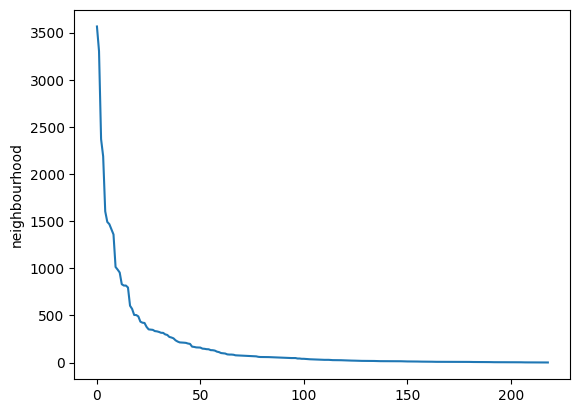

In [9]:
n_cnts = df6['neighbourhood'].value_counts()

sns.lineplot(x=range(len(n_cnts)), y=n_cnts)

## 빈도수가 일정크기 이상인 것만 취하고 나머지는 새로운 범주로 통합 (etc, other..)

def check_n_50(n) :
  if n in n_cnts[:50] :
    return n
  else :
    return 'Other'

check_n_50('Richmondtown')

df7 = df6.copy()
df7['neighbourhood'] = df6['neighbourhood'].map(check_n_50)


<Axes: xlabel='neighbourhood', ylabel='price'>

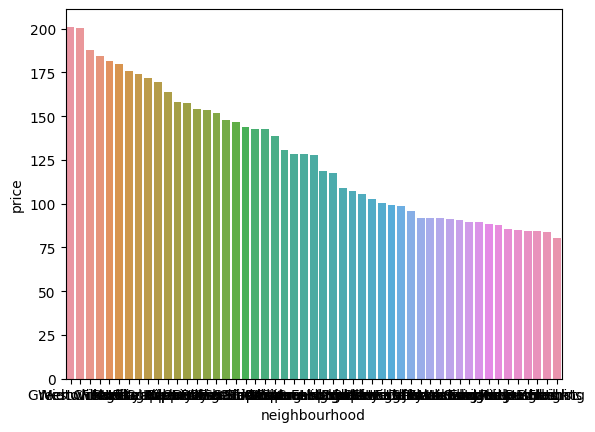

In [10]:
df7_tmp = df7.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

sns.barplot(x=df7_tmp.index, y=df7_tmp)


In [11]:
## host_name

h_cnts = df7['host_name'].value_counts()

#sns.lineplot(x=range(len(h_cnts)), y=h_cnts)
#plt.xlim((0, 300))

def check_h_200(h) :
  if h in h_cnts[:200] :
    return h
  else :
    return 'Other'

df8 = df7.copy()
df8['host_name'] = df7['host_name'].map(check_h_200)

In [12]:
df8['host_name'].value_counts()

Other      27113
Michael      351
David        343
Alex         238
Sarah        213
           ...  
Luke          32
Alexis        32
Rafael        32
Wendy         32
Claire        32
Name: host_name, Length: 201, dtype: int64

In [ ]:
df8.info()

In [14]:
# 미기입/오기입 데이터 처리하기    
# 결측치 채우기
     


In [ ]:
#df8_cate
#df8_cate_1hot.shape
df8_cate_1hot
df8_num
df8_1hot

In [15]:
# 범주형 데이터와 수치형 데이터 자르기

df8_cate = df8.select_dtypes('object')
df8_num = df8.select_dtypes('int64').drop('price', axis=1)
df8_target = df8['price']


# 데이터 전처리1
# 범주형 데이터 ont-hot 인코딩

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df8_cate_1hot = pd.get_dummies(df8_cate)

df8_1hot = pd.concat([df8_num, df8_cate_1hot], axis=1)


# 훈련데이터와 타겟데이터 구분하고 훈련용, 테스트용 분리하기
trd, tsd, trt, tst = train_test_split(df8_1hot, df8_target, train_size=0.8, random_state=42)


# 데이터 전처리2
# 수치형 데이터 표준화
ss = StandardScaler()
scaled_trd = ss.fit_transform(trd)
scaled_tsd = ss.transform(tsd)

scaled_trd_df = pd.DataFrame(scaled_trd, columns=trd.columns)
scaled_tsd_df = pd.DataFrame(scaled_tsd, columns=tsd.columns)
 
# 선형회귀 모델 학습 및 평가
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(scaled_trd_df, trt)
lr.score(scaled_trd_df, trt), lr.score(scaled_tsd_df, tst)

(0.4916373455846479, 0.4698348438946395)

In [ ]:
## 성능이 나쁠 경우
## 1. 데이터 개수가 적어서
## 2. 특성을 잘못 선택해서
## 3. 전처리를 잘못해서
## 4. 모델을 잘못 선정해서

## 회귀로는 한계가 있음 -> 비선형 데이터


